# MOBILE PRICE & CLASSIFICATION

<img src="https://gate.bisaai.id/elearning2/portofolio/media/foto_portofolio/2022-08-28_110856_17303_foto_portofolio.png" alt="Economic News">

<a href="https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv" target="_blank">Data burada</a>

* Ceptelefonları, kullanıcıları yeni özellikler geldiğinde cep telefonlarını sürekli değiştirdikleri için en çok satan elektronik eşyalardır. Her gün binlerce mobil cihaz satılmakta, bu durumda kendi ceptelefonu işini kurmayı planlayan biri için, telefonların fiyatlarını belirleyecek bir model geliştireceğiz.Hem müşterilerin ihtiyaçlarını karşılayacak hemde maliyeti karşılayabilecek birtelefonun fiyatını nasıl tahmin edeceğiz.

## CSV'ye Dönüştürme İşlemi

Bu hücrede, metin verilerimi nasıl CSV formatına dönüştürdüğümü göstereceğim. Aşağıdaki adımları takip ettim:

1. **Gerekli Kütüphaneler**:
   - `**pandas**`: Veri analizi için yaygın olarak kullanılan bir kütüphane.
   - `**StringIO**`: Metin verilerini dosya benzeri bir nesne olarak okumak için kullanılır.

2. **Veri Metni**:
   - Verilerim başlangıçta metin formatındaydı. Aşağıdaki gibi bir değişken oluşturduğumda verilerimi bu değişkene yazdım:
   ```python
   data = """battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
   842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
   1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
   ...
   1866,0,0.5,0,13,1,52,0.7,185,1,17,356,563,373,14,9,3,1,0,1,0"""

3. **Df'ye dönüştürdüm**
   - `df = pd.read_csv(StringIO(data))` 
  
   
5. **CSV formatında kaydettim**  
   - `df.to_csv('mobile_data.csv', index=False)` 

### Data Dict.

1. **battery_power**: Cihazın bataryasının gücü (mAh cinsinden).
2. **blue**: Bluetooth özelliğinin varlığı (0: yok, 1: var).
3. **clock_speed**: Cihazın işlemci saat hızı (GHz cinsinden).
4. **dual_sim**: Çift SIM kart desteği (0: yok, 1: var).
5. **fc**: Ön kameranın çözünürlüğü (megapiksel cinsinden).
6. **four_g**: 4G desteği (0: yok, 1: var).
7. **int_memory**: Dahili hafıza (GB cinsinden).
8. **m_dep**: Cihazın derinliği (cm cinsinden).
9. **mobile_wt**: Cihazın ağırlığı (gram cinsinden).
10. **n_cores**: İşlemci çekirdek sayısı.
11. **pc**: Arka kameranın çözünürlüğü (megapiksel cinsinden).
12. **px_height**: Cihazın ekran yüksekliği (piksel cinsinden).
13. **px_width**: Cihazın ekran genişliği (piksel cinsinden).
14. **ram**: Cihazın RAM miktarı (MB cinsinden).
15. **sc_h**: Ekran yüksekliği (inç cinsinden).
16. **sc_w**: Ekran genişliği (inç cinsinden).
17. **talk_time**: Cihazın konuşma süresi (saat cinsinden).
18. **three_g**: 3G desteği (0: yok, 1: var).
19. **touch_screen**: Dokunmatik ekran özelliği (0: yok, 1: var).
20. **wifi**: Wi-Fi desteği (0: yok, 1: var).
21. **price_range**: Cihazın fiyat aralığı (0, 1, 2, 3 olarak sınıflandırılmıştır).

In [1]:
#pip install tensorflow

In [2]:
# kütüphanelerin güncelliğini kontrol ediyorum, DEEP lEARNİNG yapacağım

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [4]:
import sklearn
print(sklearn.__version__)

1.4.2


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
## EDA

In [10]:
df=pd.read_csv("mobile_data.csv")

In [11]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Data Visualization

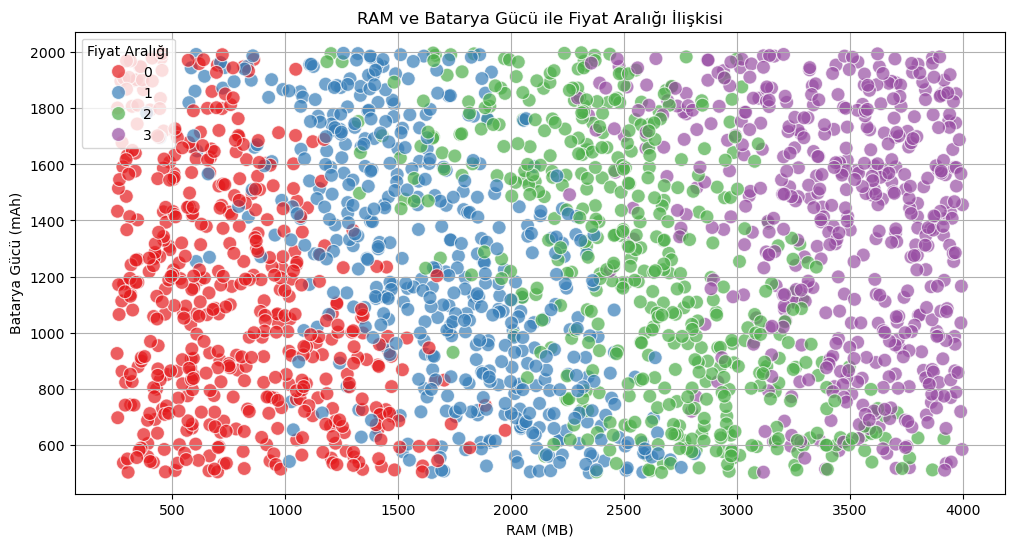

In [14]:
palette = sns.color_palette("Set1", n_colors=4)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ram', y='battery_power', hue='price_range', palette=palette, s=100, alpha=0.7)
plt.title('RAM ve Batarya Gücü ile Fiyat Aralığı İlişkisi')
plt.xlabel('RAM (MB)')
plt.ylabel('Batarya Gücü (mAh)')
plt.legend(title='Fiyat Aralığı')
plt.grid(True)
plt.show()

* batarya ve ram birlikte arttıkça fiyat artıyor, ram arttıkça fiyat belirgin bir şekilde artıyor, fakat ram in fiyat artışına etkisi bataryadan daha yüksek. 

In [15]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


## Modelling

In [19]:
x=df.drop('price_range',axis=1)   
y=df[['price_range']]

In [20]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [21]:
# Modeli oluşturma
model = Sequential()
model.add(Dense(19, activation='relu')) 
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Çıkış katmanı için softmax çünkü multi class
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping yapacağım 5 epoch boyunca ilerlemezse duracak
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(x, y, epochs=50, batch_size=32, validation_split=0.20, verbose=1, callbacks=[early_stopping])

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2864 - loss: 54.1823 - val_accuracy: 0.4650 - val_loss: 3.1249
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4639 - loss: 2.8671 - val_accuracy: 0.4850 - val_loss: 2.0372
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4794 - loss: 2.3693 - val_accuracy: 0.4775 - val_loss: 1.5827
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5008 - loss: 1.5490 - val_accuracy: 0.5025 - val_loss: 1.3856
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5499 - loss: 1.3582 - val_accuracy: 0.5025 - val_loss: 1.5822
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5339 - loss: 1.6195 - val_accuracy: 0.4875 - val_loss: 3.1133
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5227 - loss: 2.0297 - val_accuracy: 0.5250 - val_loss: 1.4725
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5611 - loss: 1.4222 - val_accuracy: 0.5175 - val_los

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 19)                    │             399 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 120)                   │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 80)                    │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 64)                    │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 20)                    │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 4)                     │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,143 (223.22 KB)

 Trainable params: 19,047 (74.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,096 (148.82 KB)

<span style="color:purple; font-weight:900;"> Model %71 başarı sağladı, datayı scale edip tekrar deneyeceğim, artacağını zannediyorum. Gerekli paketi import etmiştim.</span>

In [23]:
x=scale(x)

In [24]:
history=model.fit(x,y,epochs=30,batch_size=32,validation_split=0.20,verbose=1)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3267 - loss: 1.3283 - val_accuracy: 0.7000 - val_loss: 0.7747
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - loss: 0.7061 - val_accuracy: 0.7975 - val_loss: 0.4965
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8122 - loss: 0.4606 - val_accuracy: 0.8325 - val_loss: 0.4342
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.3847 - val_accuracy: 0.8400 - val_loss: 0.3787
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8758 - loss: 0.3153 - val_accuracy: 0.8525 - val_loss: 0.3376
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8951 - loss: 0.2628 - val_accuracy: 0.8575 - val_loss: 0.3449
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9101 - loss: 0.2306 - val_accuracy: 0.8400 - val_loss: 0.3643
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9244 - loss: 0.2034 - val_accuracy: 0.8575 - val_loss:

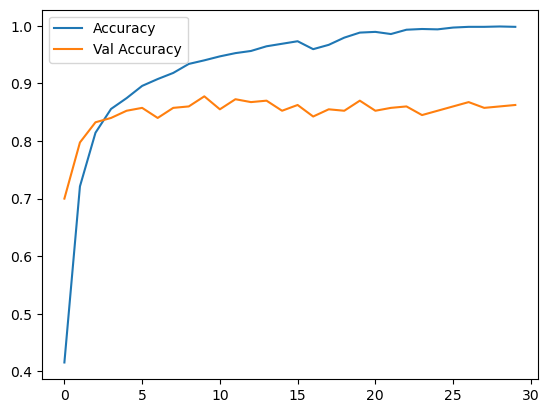

In [25]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()

In [26]:
score=model.evaluate(x,y)
#başarı orannı ölçüyor,loss fonksiyonu 0.0286- başarı oranı  %99.49
# modelim tüm sınıfları neredeyse doğru tahmin etmiş.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9949 - loss: 0.0286


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


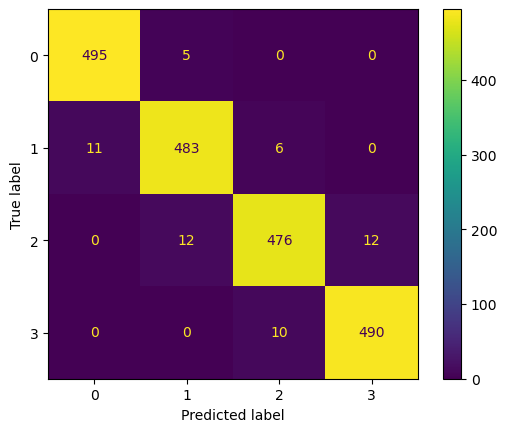

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x)
y_classes = np.argmax(y_pred, axis=1)  # En yüksek olasılığa sahip sınıfı al

cm = confusion_matrix(y, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# tabloda görüldüğü gibi model yüksek bir başarı sağlamış, 2.3. sınıflarda biraz şaşırmış ama genel olarak başarılı